# Sætter partier og regioner ind i G og rewriter filen

In [165]:
import networkx as nx
import pickle

import pandas as pd


In [166]:
data=pd.read_csv("danish_politkere_twitter2.csv")

## Laver også om i  csv filen så partier med sammee navn, men skrevet anderledes er det samme i filen

In [167]:
data.groupby('Party').count()

,Names,Twittername,Region
Party,,,
Alternativet,2,2,2
Dansk Folkeparti,21,21,21
Det Konservative Folkeparti,20,20,20
Enhedslisten,16,16,16
Enhedslisten - De Rød-Grønne,3,3,3
Inuit Ataqatigiit,1,1,1
Liberal Alliance,7,7,7
Nye Borgerlige,4,4,4
Radikale Venstre,23,23,23


In [437]:
G = nx.read_gpickle("second_network_w_weights_listversion_wrealnames.gpickle")

In [438]:
G.number_of_nodes()

496

In [439]:
def pre_check():
    nodes = G.nodes()
    count=0
    for node in nodes:
        if node in data.values:
            count+=1
    return (count == G.number_of_nodes())



In [440]:
if pre_check():
    dict_of_attributes = {}
    for node in G.nodes():
        x = data.loc[data['Twittername'] == node]
        party =  x.values[0][2]
        region = x.values[0][3]
        print(node, party, region)
        attribute = {'party': party, 'region': region}
        dict_of_attributes[node] = attribute
    nx.set_node_attributes(G, dict_of_attributes)

larsloekke Venstre sjælland
regeringDK UNKNOWN UNKNOWN
JakobEllemann Venstre midtjylland
oestergaard Radikale Venstre midtjylland
Pia_Kjaersgaard Dansk Folkeparti hovedstadan
Joymogensen UNKNOWN UNKNOWN
PSkipperEL Enhedslisten hovedstadan
MogensJensenS Socialdemokratiet midtjylland
FrankJensenKBH Socialdemokratiet UNKNOWN
Finansmin UNKNOWN UNKNOWN
IdaAuken Radikale Venstre hovedstadan
MarieKrarup Dansk Folkeparti syddanmark
Kristian_Jensen Venstre midtjylland
uffeelbaek UNKNOWN UNKNOWN
SorenPape Det Konservative Folkeparti midtjylland
RasmusJarlov Det Konservative Folkeparti hovedstadan
PiaOlsen Socialistisk Folkeparti hovedstadan
Heunicke Socialdemokratiet sjælland
DKsundhed UNKNOWN UNKNOWN
sofiecn UNKNOWN UNKNOWN
JeppeKofod Socialdemokratiet UNKNOWN
Statsmin Venstre UNKNOWN
Nickerup Socialdemokratiet hovedstadan
Astridkrag Socialdemokratiet sjælland
ammitzbollbille Uden for folketingsgrupperne hovedstadan
MiaNyegaard UNKNOWN UNKNOWN
BHaarder Venstre sjælland
DanJoergensen Socialdemok

 ## Yikes on amount of unknowns
Some googles show a lot of "Byråd / kommunalbestyrelsen"

# Count links betweeen parties

## with unknowns

In [441]:
parties = list(nx.get_node_attributes(G,'party').values())

In [442]:
politicians=list(G.nodes)


In [443]:
tweet_to_count = {}


for party in unique_parties:
    tweet_to_count[party] = 0
    tweet_out_count[party] = 0


In [444]:
# party in + out degrees

    

print(G.number_of_edges())
for edge in G.edges():
    _from = edge[0]
    _to = edge[1]
    _to_party = parties[politicians.index(_to)]
    _out_party = parties[politicians.index(_from)]

    tweet_to_count[_to_party] += 1
    tweet_out_count[_out_party] += 1

    
tweet_to_count = dict(sorted(tweet_to_count.items(), key=lambda item: item[1], reverse=True))
tweet_out_count = dict(sorted(tweet_out_count.items(), key=lambda item: item[1],reverse=True))


1488


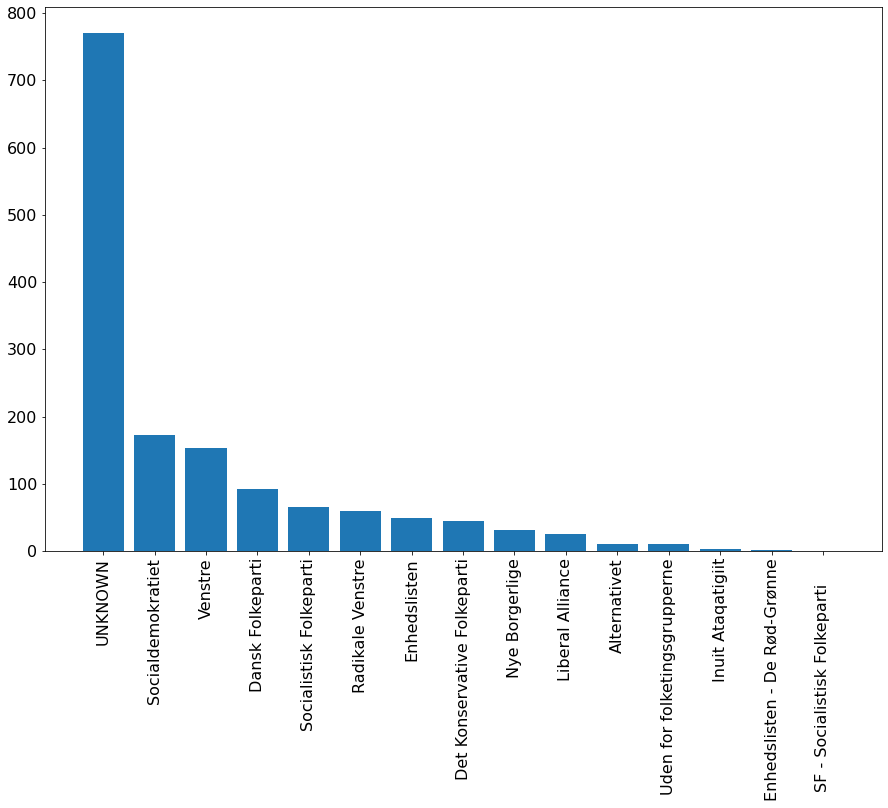

In [445]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.subplots(figsize=(15,10))

plt.tick_params(labelsize=16)
plt.xticks(rotation=90)
plt.bar(tweet_out_count.keys(), tweet_out_count.values())

plt.show()

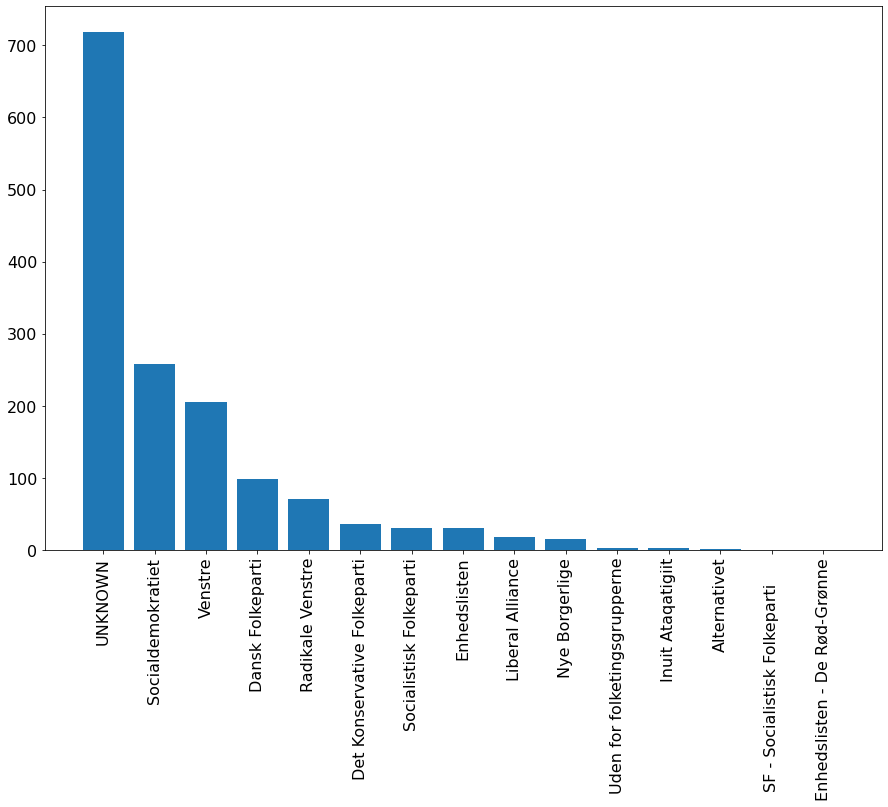

In [446]:
fig = plt.subplots(figsize=(15,10))

plt.tick_params(labelsize=16)
plt.xticks(rotation=90)
plt.bar(tweet_to_count.keys(), tweet_to_count.values())
plt.show()

## Without unknowns

In [447]:
tweet_to_count.pop('UNKNOWN')
tweet_out_count.pop('UNKNOWN')

770

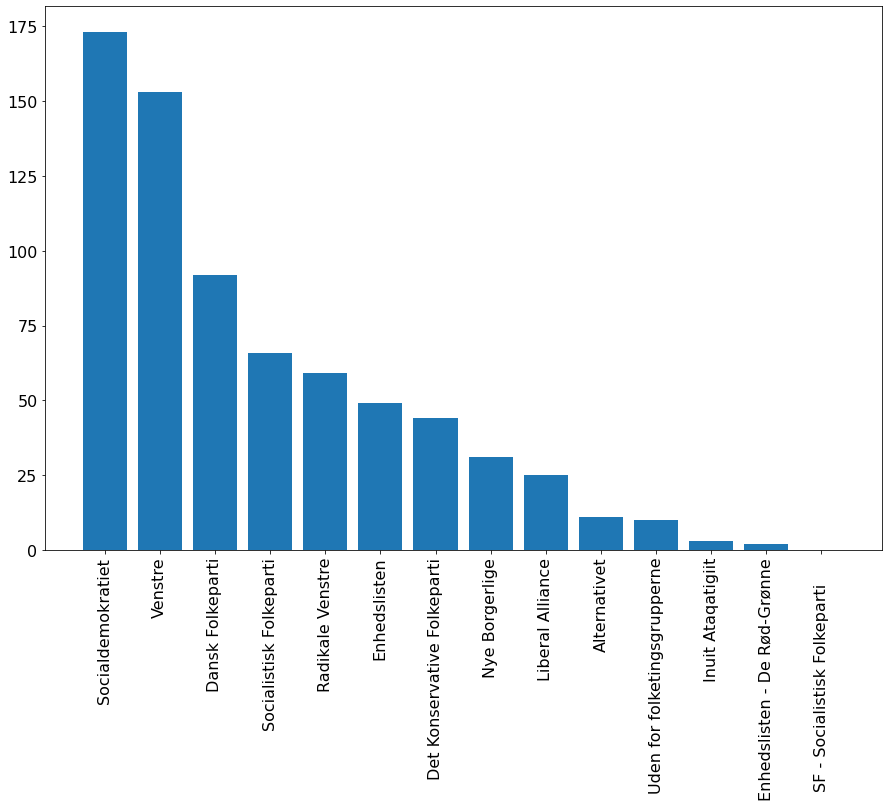

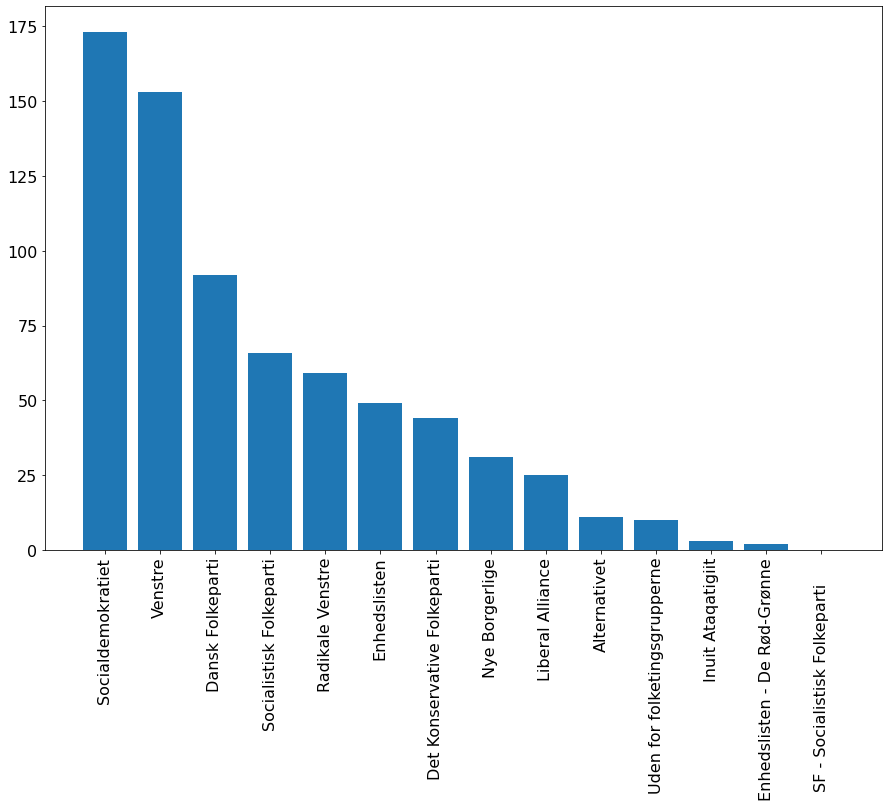

In [448]:
fig = plt.subplots(figsize=(15,10))

plt.tick_params(labelsize=16)
plt.xticks(rotation=90)
plt.bar(tweet_out_count.keys(), tweet_out_count.values())

plt.show()

fig = plt.subplots(figsize=(15,10))

plt.tick_params(labelsize=16)
plt.xticks(rotation=90)
plt.bar(tweet_out_count.keys(), tweet_out_count.values())

plt.show()

In [451]:
Gcc = sorted(nx.weakly_connected_components(G), key=len, reverse=True)

giant = G.subgraph(Gcc[0])
giant = giant.to_undirected()



for node in list(giant.nodes()):
    if (giant.degree(node) <= 5):
        giant.remove_node(node)

parties = list(nx.get_node_attributes(giant,'party').values())
color_map = []
d = dict(giant.degree) #degrees for every node

#Making color list
for i in range(len(parties)): #for all nodes
    if parties[i] == 'Socialdemokratiet':
        color_map.append('red')
    elif parties[i] == 'Venstre':
        color_map.append('blue')
        
    elif parties[i]=='Dansk Folkeparti':
        color_map.append('pink')
        
    elif parties[i]=='Socialistisk Folkeparti':
        color_map.append('brown')
        
    elif parties[i] == 'Radikale Venstre':
        color_map.append('#1f78b4')
        
    elif parties[i] == 'Enhedslisten':
        color_map.append('#D0004D')
        
    elif parties[i] == 'Det Konservative Folkeparti':
        color_map.append('#00583C')
        
    elif parties[i] == 'Nye Borgerlige':
        color_map.append('#235d66')
    elif parties[i] == 'Liberal Alliance':
        color_map.append('orange')
    elif parties[i] == 'Alternativet':
        color_map.append('yellow')
    elif parties[i] == 'Uden for folketingsgrupperne':
        color_map.append('black')
    else:
        color_map.append('grey')

100%|██████████| 2000/2000 [00:00<00:00, 2260.09it/s]


BarnesHut Approximation  took  0.19  seconds
Repulsion forces  took  0.54  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.06  seconds


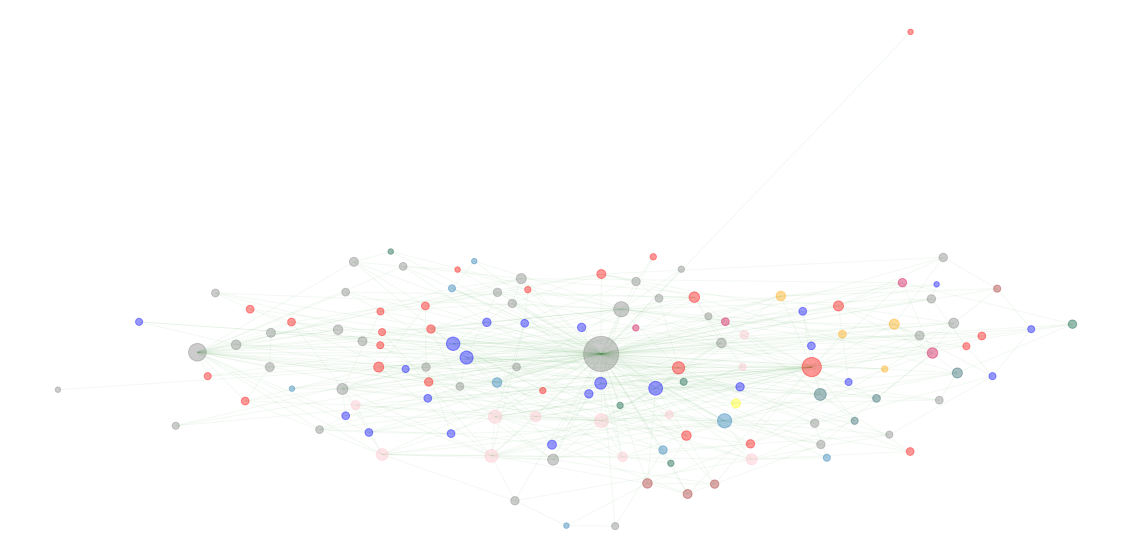

In [453]:
from fa2 import ForceAtlas2

forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs   #Want hubs inside other!
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=2.0,
                        strongGravityMode=False,
                        gravity=1.0,

                        # Log
                        verbose=True)


positions = forceatlas2.forceatlas2_networkx_layout(giant, pos=None, iterations=2000)

plt.figure(figsize=(20,10))
nx.draw_networkx_nodes(giant, positions, node_color=color_map, alpha=0.4,node_size=[v * 10 for v in d.values()])
nx.draw_networkx_edges(giant, positions, edge_color="green", alpha=0.05)
plt.axis('off')
plt.show()

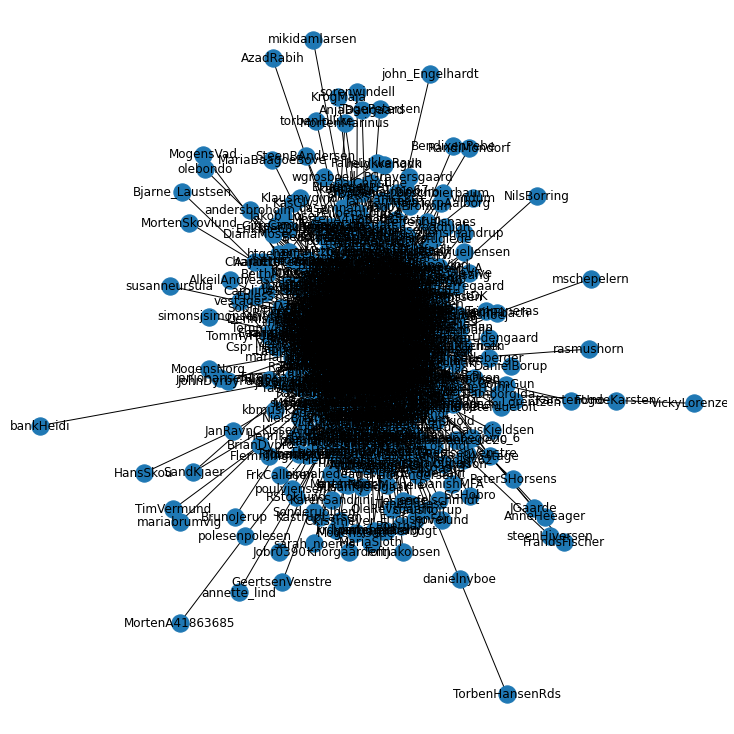

In [435]:
plt.figure(figsize=(10,10))
nx.draw_kamada_kawai(giant,with_labels=True)
nx.draw(giant,with_labels=True)